In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("/Users/apple/Desktop/Loan Data (1).csv")
#reading the csv file from the location

/var/folders/k6/tndr_j595cd7vbhcmdzm_h940000gn/T/ipykernel_8798/320926850.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/Users/apple/Desktop/Loan Data (1).csv")


In [49]:
df1=100*df.isnull().mean()
#finding the percentage of missing values

In [11]:
print(df1)

id                               0.0
member_id                        0.0
loan_amnt                        0.0
funded_amnt                      0.0
funded_amnt_inv                  0.0
term                             0.0
int_rate                         0.0
installment                      0.0
grade                            0.0
sub_grade                        0.0
emp_title                        0.0
emp_length                       0.0
home_ownership                   0.0
annual_inc                       0.0
verification_status              0.0
issue_d                          0.0
loan_status                      0.0
pymnt_plan                       0.0
url                              0.0
desc                             0.0
purpose                          0.0
title                            0.0
zip_code                         0.0
addr_state                       0.0
dti                              0.0
delinq_2yrs                      0.0
earliest_cr_line                 0.0
i

In [16]:
df2 = df.drop(columns=(["mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "mths_since_last_major_derog"]))
#dropping the unwanted columns

In [17]:
print(df2)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... total_rec_int  \
0       36 months   10.65%       162.87     B        B2  ...        863.16   
1  

In [18]:
df1=100*df2.isnull().mean()

In [19]:
print(df1)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 

#importing the plotting packages

In [21]:
import warnings
warnings.filterwarnings('ignore')

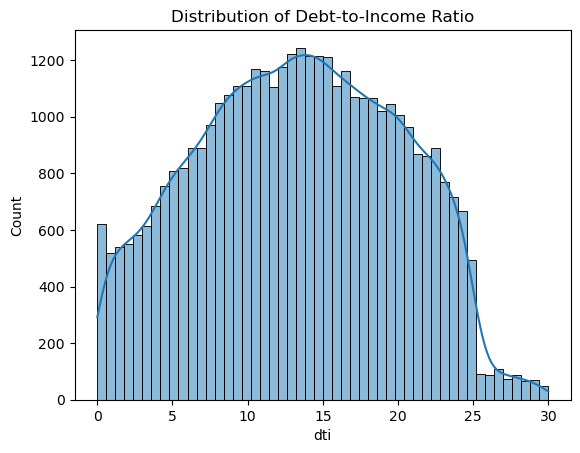

In [30]:
# Univariate Analysis
sns.histplot(df2['dti'], kde=True)
plt.title('Distribution of Debt-to-Income Ratio')
plt.show()

#Histogram:To see the distribution

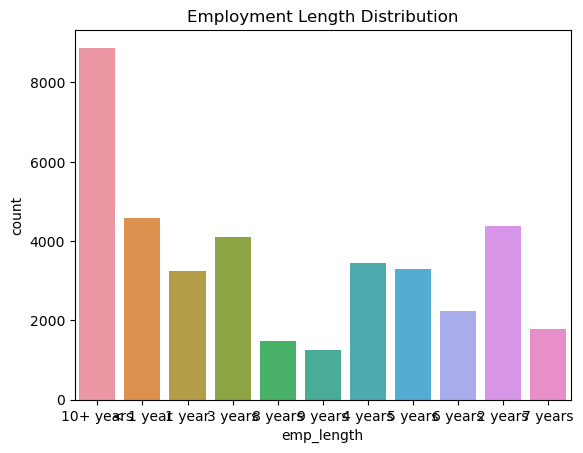

In [31]:
sns.countplot(x=df2['emp_length'])
plt.title('Employment Length Distribution')
plt.show()

#Bar Plot: To see the frequency of each employment length

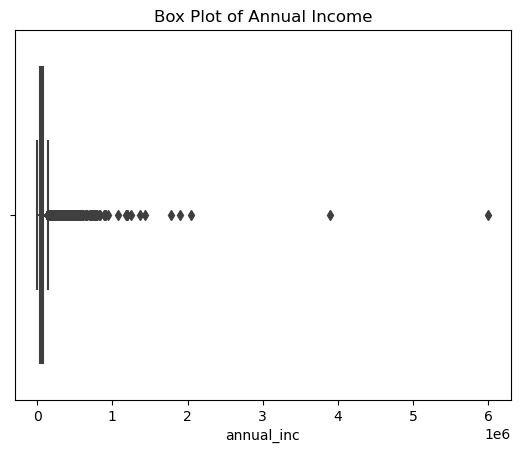

In [32]:
sns.boxplot(x=df2['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.show()

#Box Plot: To identify outliers

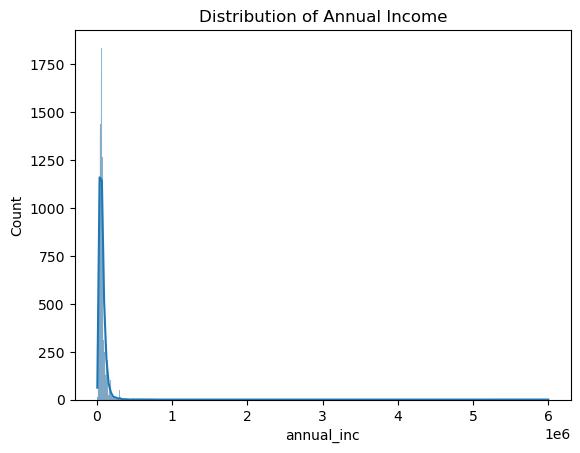

In [33]:
sns.histplot(df2['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

#Histogram: To see the distribution

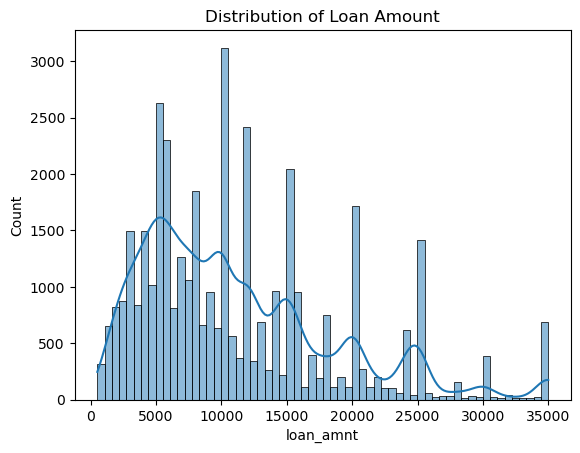

In [34]:
sns.histplot(df2['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

#Histogram: To see the distribution

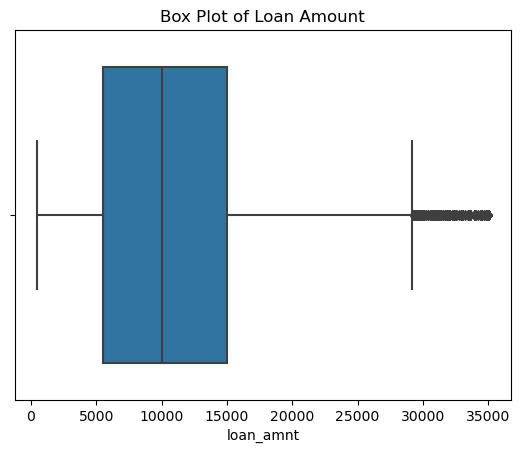

In [35]:
sns.boxplot(x=df['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.show()

#Box Plot: To identify outliers

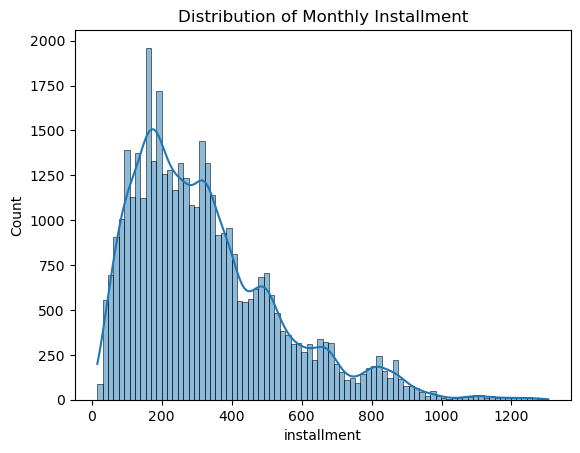

In [39]:
sns.histplot(df2['installment'], kde=True)
plt.title('Distribution of Monthly Installment')
plt.show()

#Histogram: To see the distribution

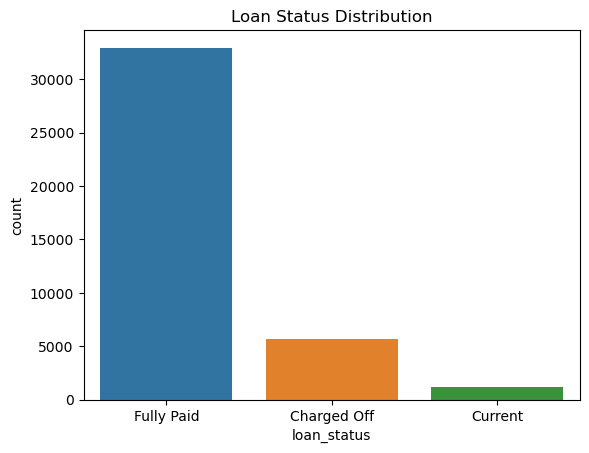

In [40]:
sns.countplot(x=df2['loan_status'])
plt.title('Loan Status Distribution')
plt.show()

#Bar Plot: To see the frequency of collections

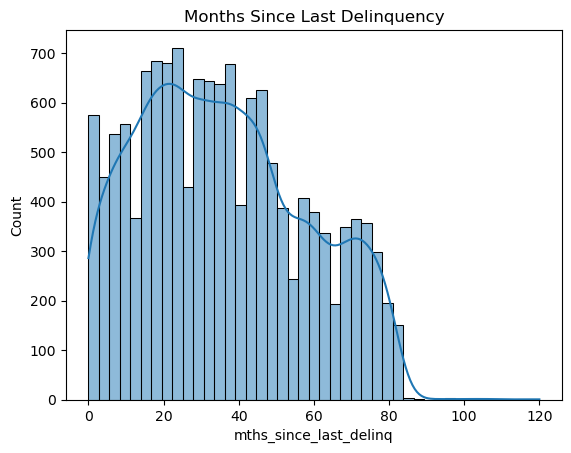

In [41]:
sns.histplot(df['mths_since_last_delinq'], kde=True)
plt.title('Months Since Last Delinquency')
plt.show()

#Histogram: To see the distribution

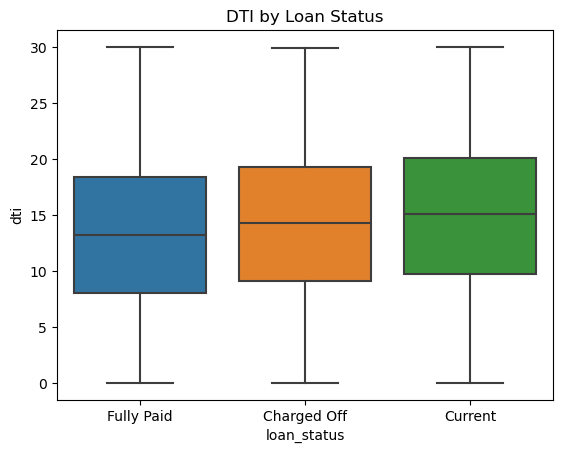

In [42]:
#Bivariate analysis
#dti vs. loan_status

sns.boxplot(x='loan_status', y='dti', data=df2)
plt.title('DTI by Loan Status')
plt.show()

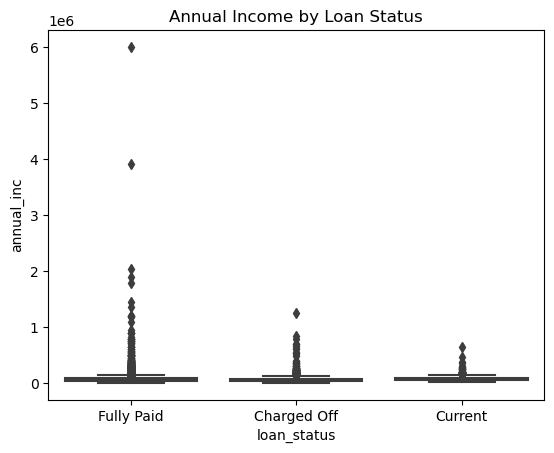

In [43]:
#Annual Income Vs. Loan_Status

sns.boxplot(x='loan_status', y='annual_inc', data=df2)
plt.title('Annual Income by Loan Status')
plt.show()

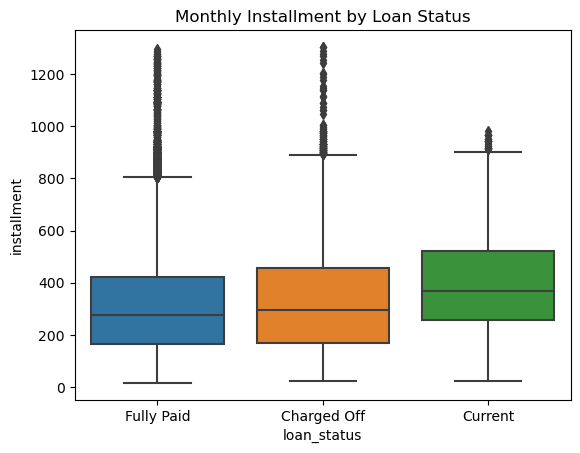

In [47]:
sns.boxplot(x='loan_status', y='installment', data=df2)
plt.title('Monthly Installment by Loan Status')
plt.show()

#Box Plot: To see the distribution of monthly installment across different loan statuses

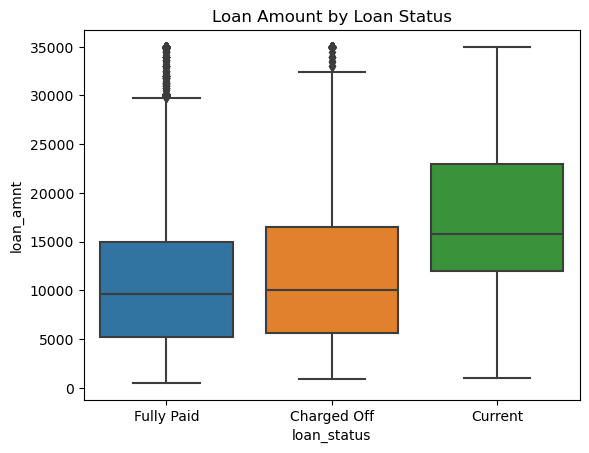

In [48]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df2)
plt.title('Loan Amount by Loan Status')
plt.show()

#Box Plot: To see the distribution of loan amount across different loan statuses

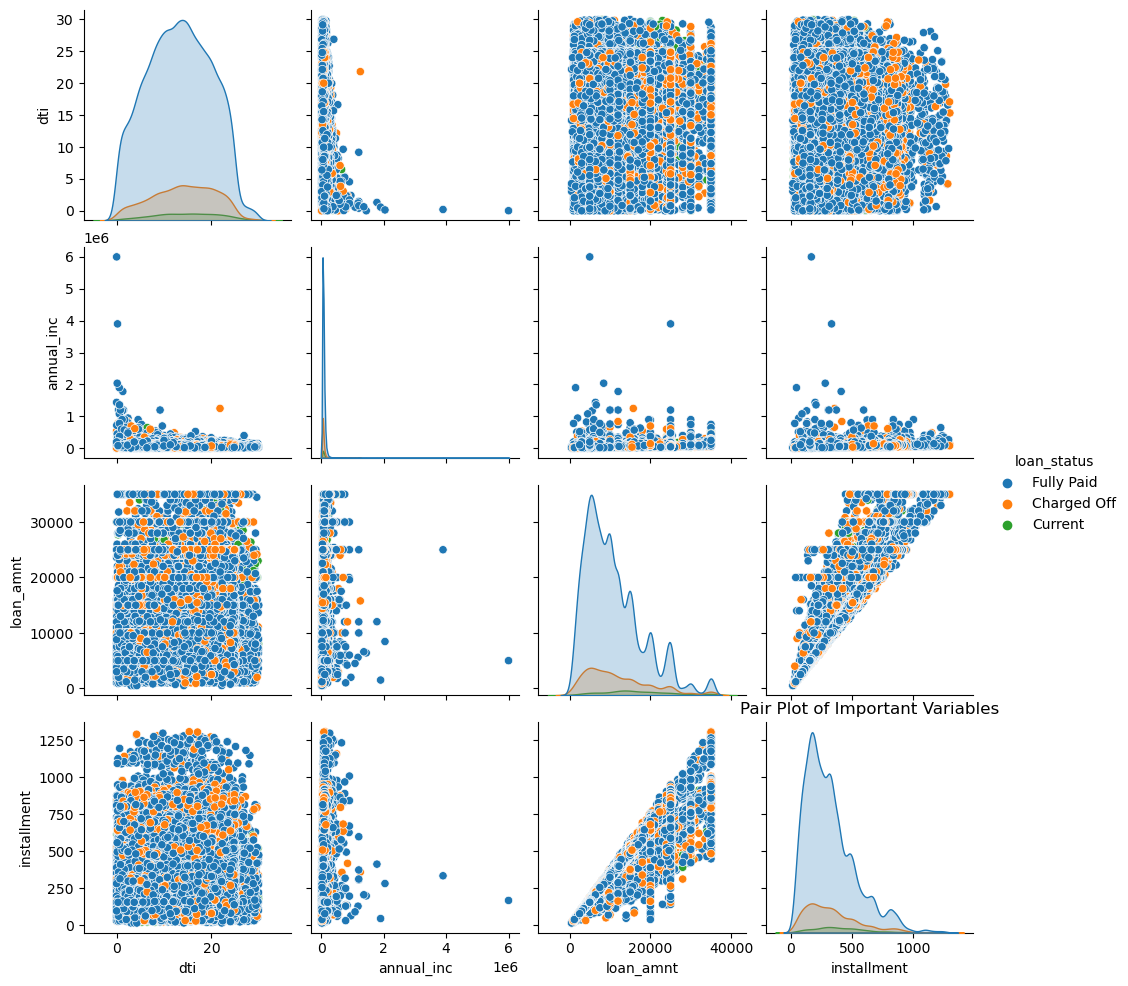

In [53]:
# Multivariate Analysis

sns.pairplot(df2[['dti', 'annual_inc', 'loan_amnt', 'int_rate', 'installment', 'revol_util', 'loan_status']], hue='loan_status')
plt.title('Pair Plot of Important Variables')
plt.show()

#Pair Plot: To see the pairwise relationships between several variables

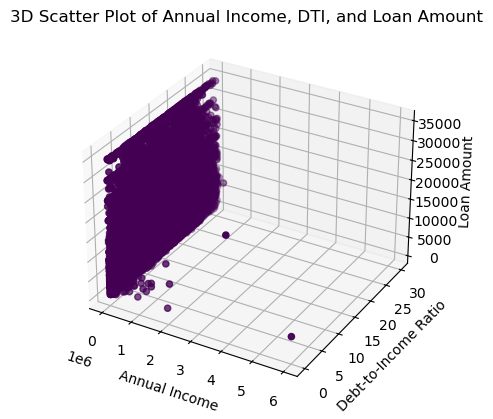

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['annual_inc'], df['dti'], df['loan_amnt'], c=df['loan_status'].apply(lambda x: 1 if x == 'Default' else 0))
ax.set_xlabel('Annual Income')
ax.set_ylabel('Debt-to-Income Ratio')
ax.set_zlabel('Loan Amount')
plt.title('3D Scatter Plot of Annual Income, DTI, and Loan Amount')
plt.show()

#3D Scatter Plot: To visualize relationships between three variables